#### Guideline
//# TODO : 명령문

(주석 아래 코드를 작성하면 됩니다)


*빈 행만큼 코드를 채우면 됩니다

# **1. 데이터 및 라이브러리 불러오기**

In [2]:
pip install konlpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 5.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /Users/lenovo/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import os
import tqdm

from konlpy.tag import Okt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [5]:
#TODO : 데이터를 import하시오 (train과 test 데이터, 자신의 데이터셋 위치 고려하여 작성!)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

# **2. 데이터 EDA**

In [6]:
train.head(2)

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0


In [7]:
test.head(2)

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
0,174304,2016,경제협력권산업육성,산업통상자원부,신규,자동차융합부품,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 차체 점용접부의 품질 검사를 위한 64채널 무선 기반 C-Scan 탐촉자 개발\...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...,○ 기술적 파급효과\n\n - 본 연구에서 개발된 R-FSSW 접합 기술은 기존 ...,"마찰교반점용접, 비파괴 검사, 초음파 탐상, 씨 스캔, 용접 품질 평가","Friction Stir Spot Welding, Non-destructive ev..."
1,174305,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,신진연구(총연구비5천이상~1.5억이하),다입자계를 묘사하는 편미분방정식에 대한 연구,자연계에는 입자의 개수가 아주 큰 다양한 다입자계가 존재한다. 이런 다입자계의 효...,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...,본 연구는 물리학에서 중요한 대상인 다입자계를 묘사하는 모델방정식의 정당성을 보장하...,"다체계 방정식,동역학의 안정성,양자역학,고전역학,평균장 극한,고전극한,비상대론적 극한","many particle system,stability of dynamics,qua..."


In [8]:
sample_submission.head(6)

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0
5,174309,0


In [9]:
#데이터 구조 파악
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(174304, 13)
(43576, 12)
(43576, 2)


In [12]:
train.label #각 label을 기후기술분류체계와 mapping 한 것 (0~44 = 1~45)

0         24
1          0
2          0
3          0
4          0
          ..
174299     0
174300     0
174301     0
174302    23
174303     0
Name: label, Length: 174304, dtype: int64

In [11]:
train.label.value_counts(sort=False) #각 label 개수

label
24      3520
0     142571
2        275
25       810
36      1060
40       441
19      4938
27       620
18      1550
29      1028
45      1137
15       165
31       922
5       1698
6         78
22       148
14      1672
20      1059
37       266
43       351
1       1261
23      1840
16       506
8        339
34       523
10       658
28       449
21       496
38       262
26       316
41        67
12       268
9        106
17       154
33       533
13       575
3        143
39       202
32       260
4         57
30       234
11       200
7        113
35       291
44        91
42        51
Name: count, dtype: int64

In [18]:
#심각한 불균형 데이터임을 알 수 있습니다.
train.label.value_counts(sort=False)/len(train) #내림차순 정렬,0 label에 속한 데이터가 많음을 알 수 있음

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

### Visualization

과제명 길이 최댓값: 229
과제명 길이 최솟값: 2
과제명 길이 평균값: 35.84252225995961
과제명 길이 중간값: 34.0


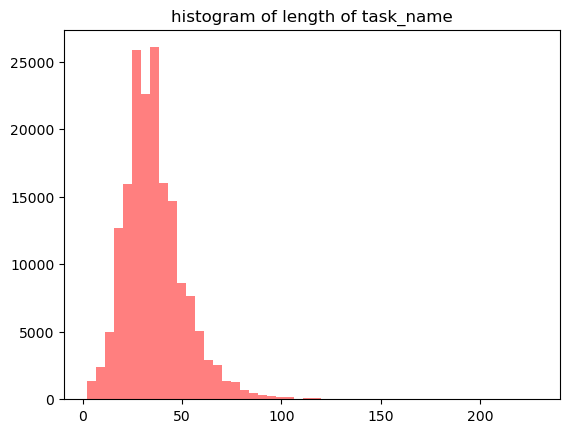

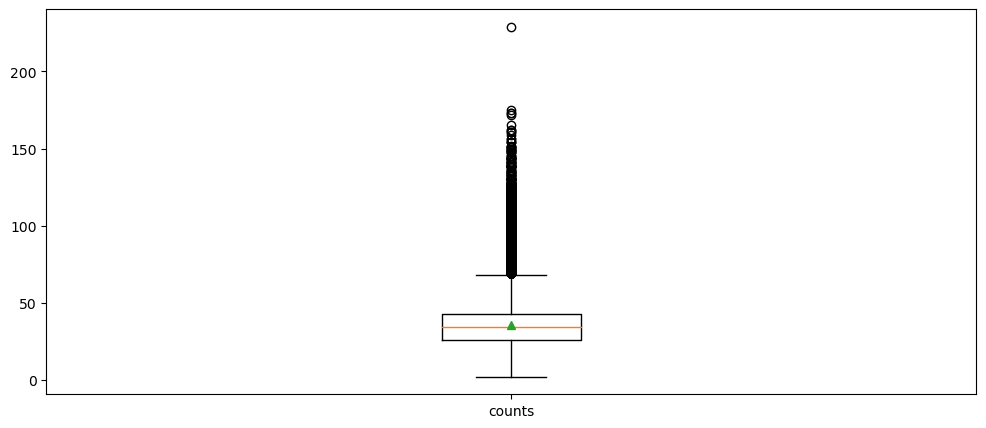

In [13]:
#각 과제명의 길이 분석으로 데이터 파악
length=train['과제명'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word') # 히스토그램 그리기 (bins = 구간 개수, label = 해당 그래프 데이터 레이블)
plt.title('histogram of length of task_name')
#boxplot 그리기
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('과제명 길이 최댓값: {}'.format(np.max(length)))
print('과제명 길이 최솟값: {}'.format(np.min(length)))
print('과제명 길이 평균값: {}'.format(np.mean(length)))
print('과제명 길이 중간값: {}'.format(np.median(length)))

요약문_연구목표 길이 최댓값: 3951
요약문_연구목표 길이 최솟값: 1
요약문_연구목표 길이 평균값: 318.1008066366807
요약문_연구목표 길이 중간값: 249.0


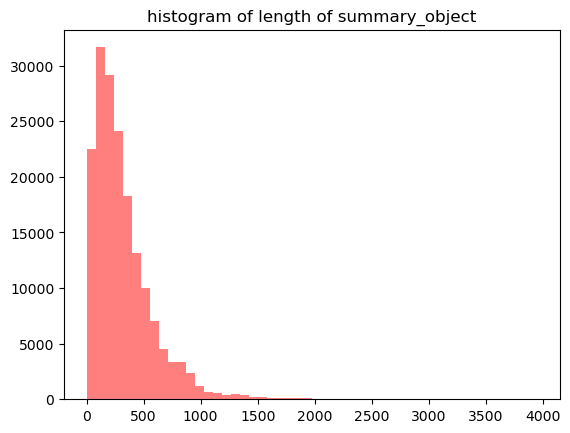

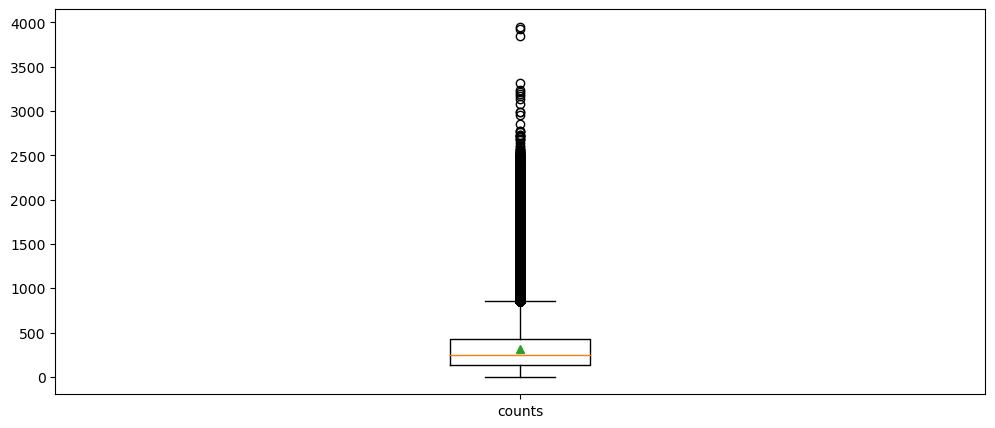

In [14]:
# TODO: 주어진 데이터의 '요약문_연구목표' 길이에 대한 히스토그램을 그리세요.
length = train['요약문_연구목표'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word') #bins = 구간 개수, label=해당 그래프 데이터 레이블 
plt.title('histogram of length of summary_object')
# TODO: 주어진 데이터의 '요약문_연구목표' 길이에 대한 boxplot을 그리시오.
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True) #label은 counts, showmeans= True
# TODO: 길이에 대한 통계량 출력
print('요약문_연구목표 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구목표 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구목표 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구목표 길이 중간값: {}'.format(np.median(length)))

요약문_연구내용 길이 최대값: 3999
요약문_연구내용 길이 최솟값: 1
요약문_연구내용 길이 평균값: 699.2930282724435
요약문_연구내용 길이 중간값: 597.0


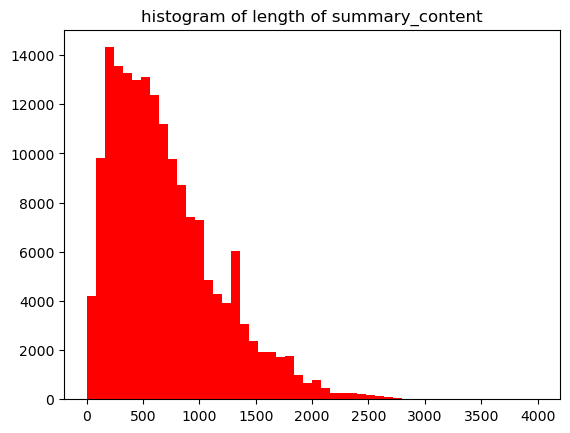

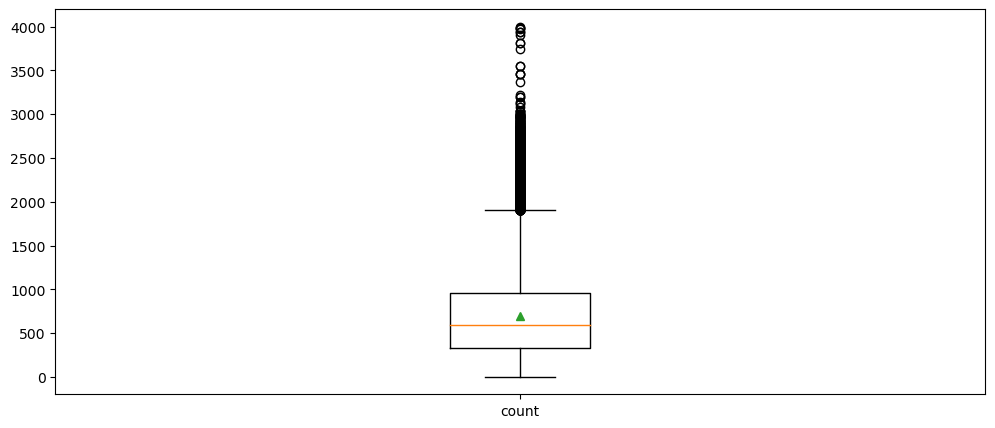

In [16]:
# TODO: 주어진 데이터의 '요약문_연구내용' 길이에 대한 히스토그램을 그리세요.
length = train['요약문_연구내용'].astype(str).apply(len)
plt.hist(length, bins=50, color='r', label='word')
plt.title('histogram of length of summary_content')
# TODO: 주어진 데이터의 '요약문_연구내용' 길이에 대한 상자 그림을 그리세요.
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['count'], showmeans=True)
# 길이에 대한 통계량 출력
print('요약문_연구내용 길이 최대값: {}'.format(np.max(length)))
print('요약문_연구내용 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구내용 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구내용 길이 중간값: {}'.format(np.median(length)))

요약문_기대효과 길이 최댓값: 3649
요약문_기대효과 길이 최솟값: 1
요약문_기대효과 길이 평균값: 400.4864374885258
요약문_기대효과 길이 중간값: 329.0


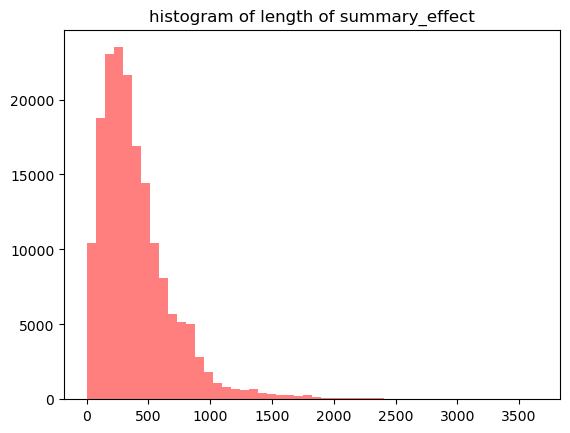

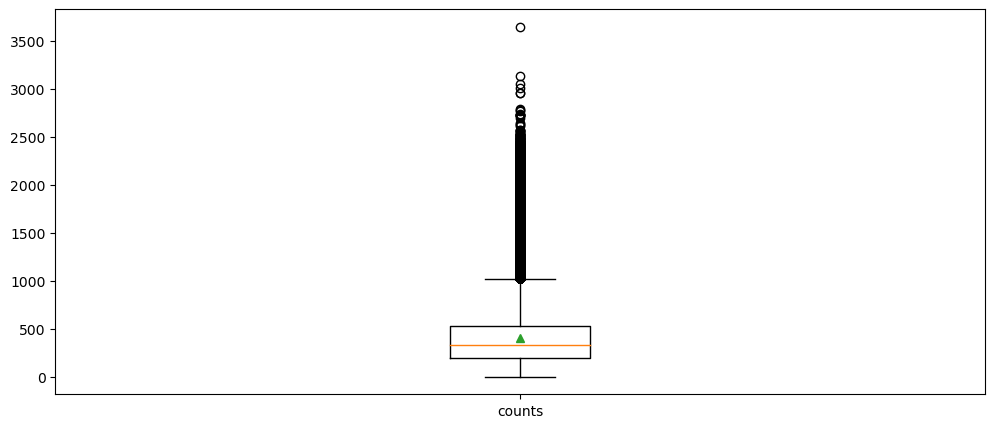

In [17]:
length=train['요약문_기대효과'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of summary_effect')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_기대효과 길이 최댓값: {}'.format(np.max(length)))
print('요약문_기대효과 길이 최솟값: {}'.format(np.min(length)))
print('요약문_기대효과 길이 평균값: {}'.format(np.mean(length)))
print('요약문_기대효과 길이 중간값: {}'.format(np.median(length)))

# **3. 데이터 전처리**

여기서는 label과 과제명만을 이용해 분류
//물론 정확하지않지만 베이스라인을 제공만하기 위해

In [21]:
train=train[['과제명','label']] #과제명과 label만을 이용해 분류할 것임
test=test[['과제명']]

In [20]:
train

,과제명,label
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,24
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,0
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,0
3,소화기 암 진단용 분자영상 형광프로브 개발,0
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,0
...,...,...
174299,혈관내막 증식을 치료하기 위한 표적분자 발굴,0
174300,삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...,0
174301,식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구,0
174302,"콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발",23


In [22]:
test.head(2)

,과제명
0,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...
1,다입자계를 묘사하는 편미분방정식에 대한 연구


In [23]:
#1. re.sub 한글 및 공백을 제외한 문자 제거
#2. okt 객체를 활용해 형태소 단위로 나눔
#3. remove_stopwords로 불용어 제거 
def preprocessing(text, okt, remove_stopwords=False, stop_words=[]):
    #TODO : 한글 및 공백을 제외한 문자 제거 
    text = re.sub(r'[^가-힣\s]','',text) #한글 및 공백제외 문자 제거 = r은 제거 ^제외 (한글) & 공백
    #형태소 단위로 쪼개기 (토큰화)
    word_text=okt.morphs(text, stem=True) #형태소 단위로 나누기 stem=True -> 각 단어에서 어간 추출하기 (각 형태소 어간 단위로 반환)
    if remove_stopwords:
        word_review=[token for token in word_text if not token in stop_words]
    return word_review

In [24]:
stop_words=['은','는','이','가', '하','아','것','들','의','있','되','수','보','주','등','한']
okt=Okt()
clean_train_text=[]
clean_test_text=[]

In [25]:
#시간이 많이 걸립니다.
for text in tqdm.tqdm(train['과제명']):
    try:
        clean_train_text.append(preprocessing(text, okt, remove_stopwords=True, stop_words=stop_words))
    except:
        clean_train_text.append([])
    

100%|█████████████████████████████████| 174304/174304 [01:57<00:00, 1484.03it/s]


In [29]:
for text in tqdm.tqdm(test['과제명']):
    if type(text) == str:
        clean_test_text.append(preprocessing(text, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_text.append([])

100%|██████████| 43576/43576 [12:25<00:00, 58.44it/s]


In [30]:
len(clean_train_text)

174304

In [31]:
len(clean_test_text)

43576

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenizer 인자에는 list를 받아서 그대로 내보내는 함수를 넣어줍니다. 또한 소문자화를 하지 않도록 설정해야 에러가 나지 않습니다.

# TODO: CountVectorizer 객체 생성 (인자: tokenizer, lowercase)
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
# TODO: 학습 데이터의 특성 추출
train_features = vectorizer.fit_transform(clean_train_text)
# TODO: 테스트 데이터의 특성 추출 (fit_transform을 사용하지 않아야 data leakage를 방지합니다)
test_features = vectorizer.transform(clean_test_text)

In [60]:
train_features

<174304x30402 sparse matrix of type '<class 'numpy.int64'>'
	with 2078154 stored elements in Compressed Sparse Row format>

In [61]:
test_features

<43576x30402 sparse matrix of type '<class 'numpy.int64'>'
	with 518549 stored elements in Compressed Sparse Row format>

# **4. 모델링**

In [67]:
#훈련 데이터 셋과 검증 데이터 셋으로 분리
TEST_SIZE=0.2
RANDOM_SEED=42

train_x, eval_x, train_y, eval_y=train_test_split(train_features, train['label'], test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [69]:
#랜덤포레스트로 모델링
from sklearn.ensemble import RandomForestClassifier
# TODO: RandomForestClassifier 모델 생성 (결정 트리 개수 100개)
forest=RandomForestClassifier(n_estimators=100)
# TODO: 학습 데이터로 모델 훈련 (시간이 굉장히 오래 걸립니다)
forest.fit(train_x, train_y)

RandomForestClassifier()

In [71]:
#모델 검증
forest.score(eval_x, eval_y)

0.9208571182696996

# **5. 예측 및 제출**

In [72]:
# TODO: 테스트 데이터에 대한 렌덤포레스트 모델 예측 
forest.predict(test_features)

array([0, 0, 0, ..., 2, 0, 0])

In [75]:
# TODO: 샘플 제출용 데이터프레임에 예측 결과 업데이트 (sample_submission df 생성)
sample_submission['label'] = forest.predict(test_features)

In [76]:
sample_submission['label'] = test_predictions

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0
...,...,...
43571,217875,0
43572,217876,0
43573,217877,2
43574,217878,0


In [77]:
sample_submission.to_csv('rf_baseline.csv', index=False)